# <2주차 : 소셜 네트워크 분석>

## 1. 소셜네트워크 분석 개요

- 네트워크 : 각각의 개체들이 상호 연결된 구조 --> 복수의 노드들이 연결된 구조  
- 구성요소 : node와 링크  
- 노드 : 고유한 속성을 가지고 있는 행위자(점)  
- 링크 : 노드들간의 관계(선)  

## 2. 네트워크 이론 기초

네트워크를 표현하는 네트워크 모델링 과정에서 중요하게 사용되는 것이 그래프, 행렬  
네트워크 그래프에서 노드와 노드 간 관계의 유무만이 아니라 관계의 정도(강도)를 함께 표시할 수 있음.  

- 그래프의 표현 방법 : 인접행렬, 노드 리스트, 엣지 리스트  
- 네트워크 유형   
    * 방향성과 가중치에 따른 부류  
    * 관계의 위상에 따른 분류  
    * 네트워크 크기에 따른 분류  
    * 분석 대상에 따른 분류 -> 전체vs하위 / 파당 / 클러스터 / ego network 등  

### 2-1. 무방향성 그래프

In [15]:
#객체 생성
fruit = nx.Graph()

In [ ]:
#node 추가
fruit.add_node("apple")
fruit.add_node("kiwi")
fruit.add_node("grape")
fruit.add_node("orange")
fruit.add_node("melon")

In [27]:
#edge 추가
fruit.add_edge("apple", "kiwi")
fruit.add_edge("grape", "melon")
fruit.add_edge("orange", "apple")
fruit.add_edge("melon", "kiwi")
fruit.add_edge("orange","melon")

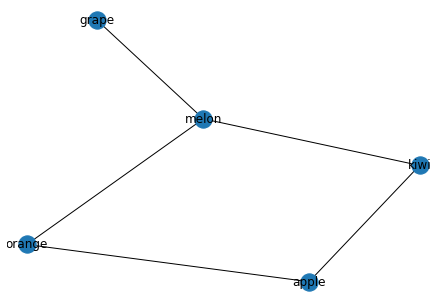

In [68]:
# 무방향성 그래프 그리기
nx.draw(fruit, with_labels = True)

### 2-2. 방향성 그래프

In [33]:
# 객체 생성
fruit2 = nx.DiGraph()

In [38]:
# node, edge 추가
fruit2.add_edges_from([("kiwi", "melon"), ("melon", "apple"), ("melon", "grape"), ("grape", "orange"),("kiwi","orange")])

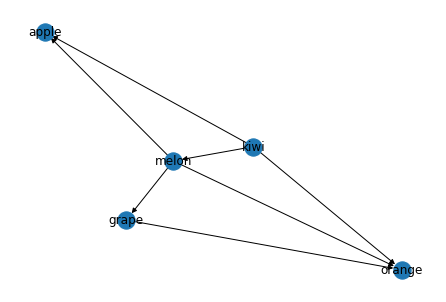

In [69]:
# 방향성 그래프 그리기
nx.draw(fruit2, with_labels = True)

## 3. 소셜 네트워크 분석 지표

1)  네트워크 수준의 속성 분석
    - 네트워크 크기
    - 네트워크 밀도
    - 포괄성
    - 연결 정도
2) 노드 수준의 속성 분석 : 연결정도, 연결거리, 직경  
3) 네트워크에 내재된 속성 분석 : 상호성, 상호성 계산, 군집화 계수  
4) 중심성 : 중심성 지표는 소셜 네트워크 분석 지표 중에서 일반적으로 가장 많이 사용되는 지표로 한 행위자가 전체 네트워크에서 중심에 위치하는 정도로 표현하는 지표    
    - 연결정도 중심성  
    - 근접 중심성  
    - 매개 중심성  
    - 아이겐벡터 중심성  

## 4. 소셜 네트워크 분석 도구 및 분석 사례

### 4-1. featuring 

In [20]:
import os #내 파일 보여주기
os.getcwd()

'C:\\Users\\KIM JI MIN\\Untitled Folder'

In [8]:
import numpy as np # 필요한 함수 불러오기
import pandas as pd
import re
import networkx as nx
import matplotlib.pyplot as plt
import time
import json
import os 
import itertools

In [10]:
featuring = pd.read_csv("featuring(1).csv", encoding="EUC-KR") # csv 파일 불러오기

In [11]:
featuring.head(10) # from 과 to가 있다는 것을 확인

,from,to
0,IU,G-DRAGON
1,EPIK HIGH,IU
2,EPIK HIGH,OH HYUK
3,IU,OH HYUK
4,HIGH4,IU
5,EPIK HIGH,MINO
6,EPIK HIGH,SIMON DOMINIC
7,EPIK HIGH,THE QUIETT
8,EPIK HIGH,SUHYUN
9,MINO,SIMON DOMINIC


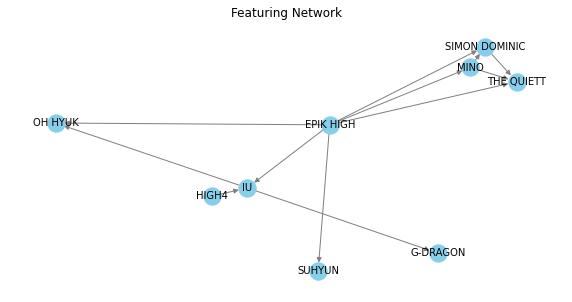

In [42]:
plt.figure(figsize=(10,5)) # 화면 구성하기
plt.title("Featuring Network") # 제목 정하기
G_f = nx.from_pandas_edgelist(featuring, 'from', 'to', create_using = nx.DiGraph()) # 그래프 그리기 
nx.draw(G_f, with_labels=True, font_size=10, node_color='skyblue', edge_color ='gray') # 각 노드의 이름을 넣어주고 컬러 정하기

### 4-2. Vienna Subway Station  
Vienna 지하철 정류장 네트워크 그리기

#### 4-2-1. 각 Station 연결하기

In [70]:
v = pd.read_csv("V subway.csv") # csv파일 불러오기
print(v)

                Start              Stop  Line  Color
0             Oberlaa            Neulaa     1    red
1              Neulaa       Alaudagasse     1    red
2         Alaudagasse     Altes Landgut     1    red
3       Altes Landgut      Troststrasse     1    red
4        Troststrasse      Reumannplatz     1    red
..                ...               ...   ...    ...
99          Spittelau     Jaegerstrasse     6  brown
100     Jaegerstrasse  Dresdner strasse     6  brown
101  Dresdner strasse        Handelskai     6  brown
102        Handelskai        Neue Donau     6  brown
103        Neue Donau       Floridsdorf     6  brown

[104 rows x 4 columns]


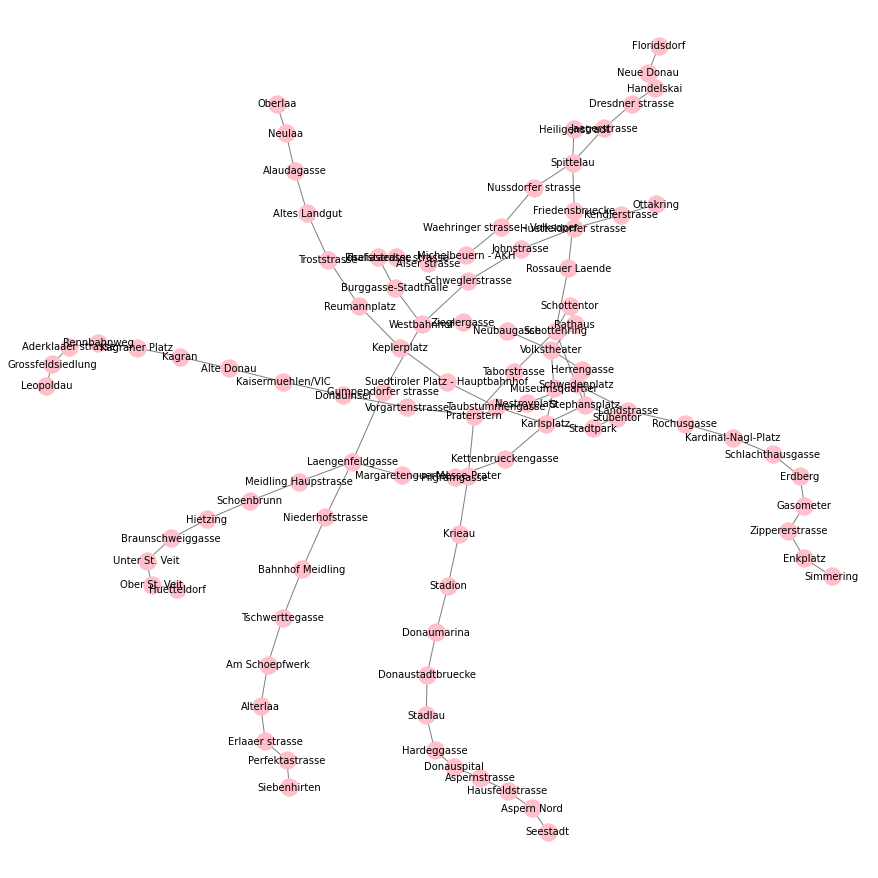

In [56]:
plt.figure(figsize=(12,12)) # 화면 구성하기
vs = nx.from_pandas_edgelist(v, source='Start', target='Stop') # 각 Station의 연결성을 위해 start와 stop을 기준으로 함
nx.draw(vs, with_labels=True, font_size=10, node_color='pink', edge_color='gray') # 각 노드의 이름 넣어주고 컬러 입히기

#### 4-2-2. 환승구간 연결하기

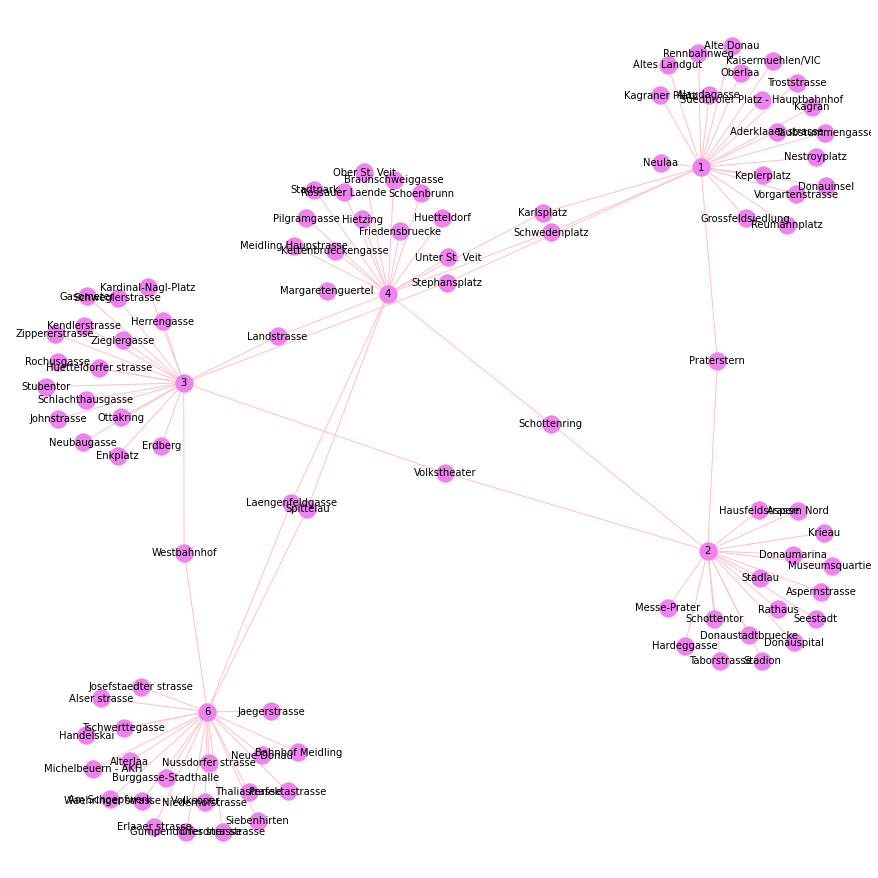

In [57]:
plt.figure(figsize=(12,12)) # 화면 구성하기
vs = nx.from_pandas_edgelist(v, source='Start', target='Line') # 각 Station의 환승 구간을 찾아보도록 연결함
nx.draw(vs, with_labels=True, font_size=10, node_color='violet', edge_color='pink') # 각 노드의 이름 넣어주고 컬러 입히기